# Lesson 2: Modeling

This notebook is designed to run in Google Colab or local Jupyter.

**Colab steps:** Open the notebook, run the setup cell below, then run cells top-to-bottom.

## Learning Objectives
- Write the nonlinear equations of motion for the cart-pole.
- Linearize the dynamics around specified equilibrium points.
- Validate the linear model against the nonlinear model.

### Parameters (update as needed)
| Symbol | Meaning | Example |
| --- | --- | --- |
| m_c | Cart mass | 0.5 kg |
| m_p | Pendulum mass | 0.2 kg |
| l | Pendulum length | 0.3 m |
| g | Gravity | 9.81 m/s^2 |
| dt | Sample time | 0.01 s |

---
## Lesson Content

In [1]:
# Install required packages (Colab)
!pip -q install numpy scipy matplotlib


## Linearization failure as a learning tool
Your nonlinear model is the truth. Your linear model is a local approximation.

- Linearize around at least two operating points (upright and a tilted angle).
- Roll out nonlinear vs linear trajectories from the same initial condition.
- Create a "far from equilibrium" test and document the failure.

Deliverable: a plot of linear vs nonlinear error growth and a 4-6 sentence explanation.


# Modeling
Before applying a proportional-integral-derivative (PID) controller, we first model and linearize the system to simplify its dynamics.

An inverted pendulum system can be modelled as following:

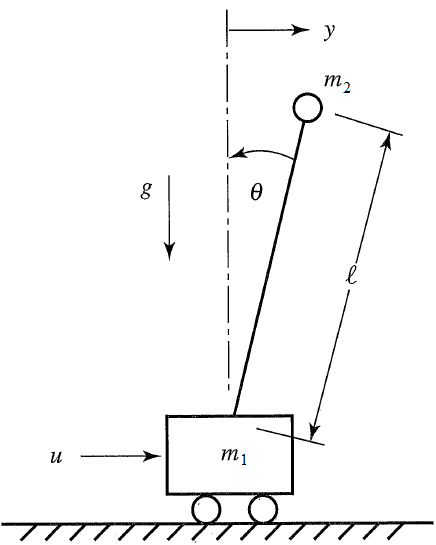


From the model, considering the kinetic and potential energy of the system.
The **nonlinear** equations of motion for the inverted pendulum are:  

$$
\dot{x} = v
$$  

$$
\dot{v} = \frac{f + m_p \sin\theta (L \dot{\theta}^2 - g  \cos\theta)}{m_c + m_p  \sin^2\theta}
$$  


$$
\dot{\theta} = \omega
$$  

$$
\dot{\omega} = \frac{-f \cos\theta - m_p L \dot{\theta}^2 \sin\theta \cos\theta + (m_c + m_p) g \sin\theta}{L (m_c + m_p  \sin^2\theta)}
$$  


Where:  
- $ f $ is the input force.  
- $ m_c $ is the mass of the cart.  
- $ m_p $ is the mass of the pole.  
- $ L $ is the length of the pole.  
- $ g $ is the acceleration due to gravity.  




Rewriting as standard State Space form:

Define $ X = \begin{bmatrix}
x \\
v \\
\theta \\
\omega
\end{bmatrix} =
\begin{bmatrix}
x_1 \\
x_2 \\
x_3 \\
x_4
\end{bmatrix}$

$$
\dot{X} =
\begin{bmatrix}
\dot{x} \\
\dot{v} \\
\dot{\theta} \\
\dot{\omega}
\end{bmatrix} =
\begin{bmatrix}
\dot{x} \\
\frac{F + m_p \sin\theta (L \dot{\theta}^2 - g  \cos\theta)}{m_c + m_p  \sin^2\theta} \\
\dot{\theta} \\
\frac{-f \cos\theta - m_p L \dot{\theta}^2 \sin\theta \cos\theta + (m_c + m_p) g \sin\theta}{L (m_c + m_p  \sin^2\theta)}
\end{bmatrix}
$$



## Linearizing the System

Nonlinear systems, like the inverted pendulum, are inherently complex and often challenging to solve analytically. For example, the dynamics of the inverted pendulum involve trigonometric functions such as sin(θ) and cos(θ), which make the equations of motion nonlinear.

By linearizing the system, we approximate its behavior near a specific operating point, such as the upright equilibrium position of the pendulum. This simplification allows us to leverage well-established methods for linear systems to design effective controllers. Near the equilibrium point, the nonlinear behavior of the system can be accurately approximated by a linear model, making analysis and control more manageable.

Since the goal of this particular system is to keep the inverted pendulum in the upright position around $ \theta = 0 $, the linearization might be considered about this upright equilibrium point.

We approximate the trigonometric functions using their first-order Taylor series expansions near this point:

1. $ \sin(\theta) \approx \theta $
2. $ \cos(\theta) \approx 1 $




## **Task:** Linearize the system for the following positions: (30 mins)
- Upward pole position
- Downward pole position

In [2]:
# Template: linear vs nonlinear comparison
# Use your nonlinear dynamics function and linearized A, B matrices.
# Replace the placeholders with your model and simulation loop.

# t = np.linspace(0, T, N)
# x0 = np.array([0.0, 0.0, np.deg2rad(10), 0.0])
# x_lin = simulate_linear(A, B, x0, u)
# x_nonlin = simulate_nonlinear(f, x0, u)
# error = np.linalg.norm(x_lin - x_nonlin, axis=1)
# plt.plot(t, error)
# plt.title('Linear vs nonlinear error growth')
# plt.xlabel('time (s)')
# plt.ylabel('state error norm')


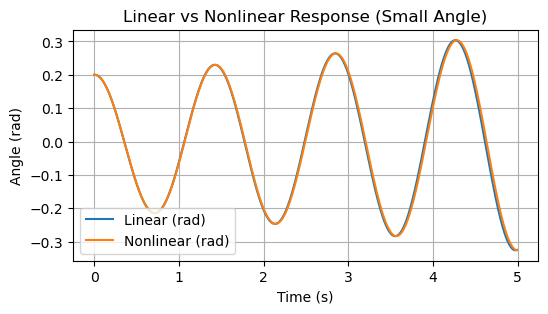

In [3]:
# Compare linear vs nonlinear pendulum response (small-angle example)
import numpy as np
import matplotlib.pyplot as plt

g = 9.81
L = 0.5
dt = 0.01
t = np.arange(0, 5, dt)
theta0 = 0.2  # rad
omega0 = 0.0

theta_lin = np.zeros_like(t)
omega_lin = np.zeros_like(t)
theta_non = np.zeros_like(t)
omega_non = np.zeros_like(t)

theta_lin[0] = theta0
theta_non[0] = theta0
omega_lin[0] = omega0
omega_non[0] = omega0

for i in range(1, len(t)):
    omega_lin[i] = omega_lin[i - 1] + dt * (-(g / L) * theta_lin[i - 1])
    theta_lin[i] = theta_lin[i - 1] + dt * omega_lin[i - 1]

    omega_non[i] = omega_non[i - 1] + dt * (-(g / L) * np.sin(theta_non[i - 1]))
    theta_non[i] = theta_non[i - 1] + dt * omega_non[i - 1]

plt.figure(figsize=(6, 3))
plt.plot(t, theta_lin, label='Linear (rad)')
plt.plot(t, theta_non, label='Nonlinear (rad)')
plt.title('Linear vs Nonlinear Response (Small Angle)')
plt.xlabel('Time (s)')
plt.ylabel('Angle (rad)')
plt.legend()
plt.grid(True)
plt.show()


**Expected output:**
- Linear and nonlinear curves overlap closely for small angles; they diverge as the angle grows.

## Failure reflection
Describe the failure case you created. Why did the linear model fail, and what does that say about its valid operating region?


---
## Checkpoints
- Linearization results match expected signs and dimensions.
- Small-angle simulations match linear model predictions.

## Common Pitfalls
- Dropping higher-order terms inconsistently.
- Using the wrong equilibrium angle for linearization.